¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# # SPRINT DE INTEGRACIÓN SPRINT 006 

# Importación de Bibliotecas y DataFrame

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from IPython.display import display
import scipy.stats as stats
from scipy import stats as st

In [2]:
games = pd.read_csv('/datasets/games.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

# Paso 2. Prepara los datos

 Revisión del DataFrame

In [3]:
display(games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Revisamos el .info() para saber cuantos elementos non-null tenemos

In [4]:
games.update

<bound method DataFrame.update of                                 Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

     

Asi como tambien revisamos el Dtype con .update

# Revisión de los NaN, TBD , Duplicidad

In [5]:
games_tbd = games[games.apply(lambda row: row.str.contains("tbd","nan").any(), axis=1)].count()
print(games_tbd)

Name               2424
Platform           2424
Year_of_Release    2376
Genre              2424
NA_sales           2424
EU_sales           2424
JP_sales           2424
Other_sales        2424
Critic_Score       1082
User_Score         2424
Rating             2374
dtype: int64


Por lo visto si tenemos string con 'tbd' o 'nan'

In [6]:
porcent_games = games.shape[0]
print(porcent_games)


16715


In [7]:
porcent_100_games =100*games.isna().sum() / porcent_games
print(porcent_100_games)

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64


Lo que realizamos al final fue el calculo en base a la funsión .isna() para saber el porcentaje de los NaN en el Dataframe de games se debe interpretar en porcentaje(%)

In [8]:
games.duplicated().sum()

0

No tenemos duplicidad en el DATAFRAME de games

# Modificación del DataFrame (lower, astype,etc) y Revisar de Nuevo el DataFrame con una explicación del porque los cambios

In [9]:
games.columns = games.columns.str.lower()

Le damos formato a las columnas con str.lower() lo usamos para facilitar las busquedas y no cometer errores

In [10]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Revisamos los cambios pertinentes

In [11]:
games.fillna(0,inplace=True)

Ponemos los valores non-null en 0 con .fillna() las razones por lo que tenemos valores ausentes son:

1.-Errores de Captura de Datos

2.-Información no Disponible

3.-Decisiones de Diseño (esto se da por principalmente por las TBD)

In [12]:
games.replace({"tbd": 0, "nan": 0}, inplace=True)

In [13]:
games['year_of_release'] = games['year_of_release'].astype(int)
games['critic_score'] = games['critic_score'].astype(int)
games['user_score'] = games['user_score'].astype(float)

Cambiamos el dtype de 'year_of_release', 'critic_score' y 'user_score' con .astype() esto nos facilitara el dtype de 'year_of_release' y 'critic_score' ya que es un int no un float 

In [14]:
games.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         int64
user_score         float64
rating              object
dtype: object

In [15]:
games_tbd  = games[games.apply(lambda row: row.str.contains("tbd","nan").any(), axis=1)].count()
print(games_tbd)

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


In [16]:
games["critic_score"].unique()

array([76,  0, 82, 80, 89, 58, 87, 91, 61, 97, 95, 77, 88, 83, 94, 93, 85,
       86, 98, 96, 90, 84, 73, 74, 78, 92, 71, 72, 68, 62, 49, 67, 81, 66,
       56, 79, 70, 59, 64, 75, 60, 63, 69, 50, 25, 42, 44, 55, 48, 57, 29,
       47, 65, 54, 20, 53, 37, 38, 33, 52, 30, 32, 43, 45, 51, 40, 46, 39,
       34, 35, 41, 36, 28, 31, 27, 26, 19, 23, 24, 21, 17, 22, 13])

In [17]:
games["user_score"].unique()

array([8. , 0. , 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 1.6,
       9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2, 0.6,
       1.4, 0.9, 1. , 9.7])

In [18]:
games["rating"].unique()

array(['E', 0, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [19]:
porcent_100_games =100*games.isna().sum() / porcent_games
print(porcent_100_games)

name               0.0
platform           0.0
year_of_release    0.0
genre              0.0
na_sales           0.0
eu_sales           0.0
jp_sales           0.0
other_sales        0.0
critic_score       0.0
user_score         0.0
rating             0.0
dtype: float64


In [20]:
display(games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  int64  
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


None

Revisamos nuevamente con .info()

In [21]:
games.update

<bound method DataFrame.update of                                 name platform  year_of_release         genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

     

Revisamos nuevamente con .update

# Paso 3. Analiza los datos

# 🔎 Ventas & Año de Lanzamiento

VENTAS TOTALES

In [22]:
games['total_sales'] = games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
games['total_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16715, dtype: float64

Creamos el Columna de 'total_sales' por cada juego que si no mal recuerdo ahi dos formas de hacerlo

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola, Guillermo! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de dos de las variables de la base de datos, consideraste ajustar los valores ausentes de las variables identificadas de score y muy buen trabajo con la suma de todas las ventas. 
    
   

</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    

    
Solamente te recomiendo que en estas columnas de 'critic_score'  mejor los completes con 'Unknown', puede ser en una columna duplicada para que puedas desarrollar los análisis posteriores. Además, te sugiero verificar si en el resto de las columnas no cuentas con datos ausentes que se deban ajustar.     

</div>

Cuantos Videojuegos fueron lanzados por año en total

# Mira cuántos juegos fueron lanzados en diferentes años.

¿Son significativos los datos de cada período?

In [23]:
platform_years= games['year_of_release'].value_counts(sort=True).reset_index()
platform_years

,index,year_of_release
0,2008,1427
1,2009,1426
2,2010,1255
3,2007,1197
4,2011,1136
5,2006,1006
6,2005,939
7,2002,829
8,2003,775
9,2004,762


Para saber de un forma rapida cuantos juegos se vendieron en cada año usamos .value_counts() y podemos ver que los 15 primeros años con mayor numero de juegos vendidos representa más del 80% ((13,638/16,715)*100 =81.59% ) del total y el 0 que tiene un total 269 juegos son los NaN que teniamos en un principio en el dataframe

In [24]:
platform_years.head(15).sum().reset_index()

,index,0
0,index,30135
1,year_of_release,13638


Son en total 31 plataformas de video juegos 

In [25]:
(13638/16715)*100

81.59138498354771

¿Es significativa esta información? Por supuesto que si ya que como observamos contiene más del 80% del total de la información del DataFrame y su periodo es del 2002 al 2016 de acuerdo .head(15) aplicado

# Observa cómo varían las ventas de una plataforma a otra.

# 🔎 Escogemos a las Plataformas con más ventas

Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. 

In [26]:
platform_sales = games.groupby('platform')['total_sales'].sum().reset_index()
platform_sales = platform_sales.sort_values(by = 'total_sales', ascending = False).reset_index()
platform_sales.head(10)

,index,platform,total_sales
0,16,PS2,1255.77
1,28,X360,971.42
2,17,PS3,939.65
3,26,Wii,907.51
4,4,DS,806.12
5,15,PS,730.86
6,6,GBA,317.85
7,18,PS4,314.14
8,19,PSP,294.05
9,13,PC,259.52


Con la Variable platform_sales podemos hacer los analisis requeridos

# ¿Qué plataformas son líderes en ventas? 

In [27]:
best_platform_sales_h = platform_sales.head(10).reset_index()
best_platform_sales_h

,level_0,index,platform,total_sales
0,0,16,PS2,1255.77
1,1,28,X360,971.42
2,2,17,PS3,939.65
3,3,26,Wii,907.51
4,4,4,DS,806.12
5,5,15,PS,730.86
6,6,6,GBA,317.85
7,7,18,PS4,314.14
8,8,19,PSP,294.05
9,9,13,PC,259.52


La columna de 'total_sales' esta en millones de dólares y estamos observado las 10 primeras plataformas de consolas que tuvieron ventas de más de 250 millones de dólares

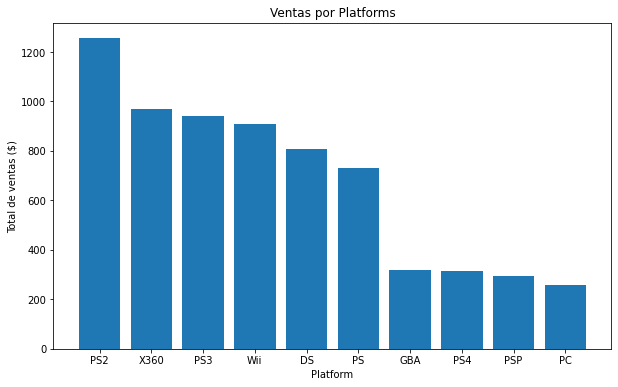

In [28]:
plt.figure(figsize=(10, 6))
plt.bar(best_platform_sales_h['platform'], best_platform_sales_h['total_sales'])
plt.xlabel('Platform')
plt.ylabel('Total de ventas ($)')
plt.title('Ventas por Platforms')
plt.show()

# Separar las platforms de acuerdo a su Compañia

In [29]:
def cia_sales(best_platform_sales_h):
    if best_platform_sales_h.startswith('PS'):
        return 'Sony'
    elif best_platform_sales_h in ['Wii', 'DS', 'GBA']:
        return 'Nintendo'
    elif best_platform_sales_h in ['X360']:
        return 'Microsoft'
    else:
        return 'PC'
best_platform_sales_h['cia_sales'] = best_platform_sales_h['platform'].apply(cia_sales)
best_cia_sales = best_platform_sales_h.groupby('cia_sales')['total_sales'].sum().reset_index()
best_cia_sales = best_cia_sales.sort_values(by = 'total_sales', ascending = False).reset_index()
best_cia_sales

,index,cia_sales,total_sales
0,3,Sony,3534.47
1,1,Nintendo,2031.48
2,0,Microsoft,971.42
3,2,PC,259.52


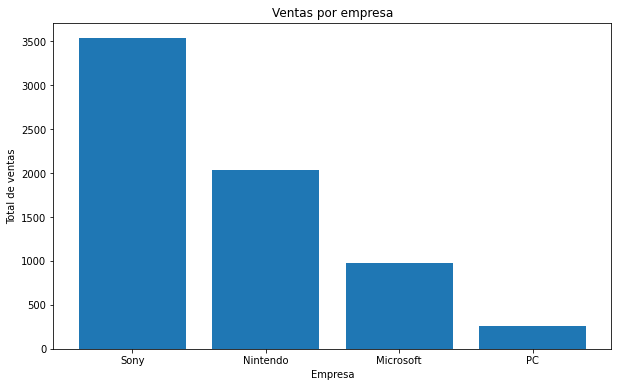

In [30]:
plt.figure(figsize=(10, 6))
plt.bar(best_cia_sales['cia_sales'], best_cia_sales['total_sales'])
plt.xlabel('Empresa')
plt.ylabel('Total de ventas')
plt.title('Ventas por empresa')
plt.show()

La compañia con mayores ganancias por venta de video juegos es SONY, seguida por NINTENDO , después MICROSOFT y por último PC pero esta es multipliplataforma ya que varios compañia crean juegos para este formato

# 🔎 Busca las plataformas que solían ser populares pero que ahora no tienen ventas.

In [31]:
old_platforms = games[games['year_of_release'] <= 2011]['platform'].unique()
current_platforms = games['platform'].unique()
old_platforms_sorted = sorted(old_platforms, key=lambda x: games[games['platform'] == x]['year_of_release'].max())    
print("Plataformas antiguas (lanzadas en 2002 o antes):")
for platform in old_platforms_sorted:
    last_year = games[games['platform'] == platform]['year_of_release'].max()
    print(f"- {platform}: Último año de venta de videojuego {last_year}")

print("\nPlataformas vigentes:")
for platform in current_platforms:
    if platform in old_platforms:
        continue
    print(f"- {platform}")

Plataformas antiguas (lanzadas en 2002 o antes):
- 2600: Último año de venta de videojuego 1989
- GG: Último año de venta de videojuego 1992
- NES: Último año de venta de videojuego 1994
- GEN: Último año de venta de videojuego 1994
- SCD: Último año de venta de videojuego 1994
- TG16: Último año de venta de videojuego 1995
- 3DO: Último año de venta de videojuego 1995
- NG: Último año de venta de videojuego 1996
- PCFX: Último año de venta de videojuego 1996
- SNES: Último año de venta de videojuego 1999
- SAT: Último año de venta de videojuego 1999
- GB: Último año de venta de videojuego 2001
- WS: Último año de venta de videojuego 2001
- N64: Último año de venta de videojuego 2002
- PS: Último año de venta de videojuego 2003
- GBA: Último año de venta de videojuego 2007
- GC: Último año de venta de videojuego 2007
- XB: Último año de venta de videojuego 2008
- DC: Último año de venta de videojuego 2008
- PS2: Último año de venta de videojuego 2011
- DS: Último año de venta de videoj

Como podemos observar las plataformas mas vigentes son PS4, XONE Y WIIU
realizo este pero falta la PC ya que sigue teniendo venta de videojuegos y es para mi en una opinión muy personal la platform con más poder grafico y tuve que hacer te algoritmo en con la columa de 'year_of_release' para tener una mejor comprención de esta pregunta ya que con solo con la columna 'total_sales' no tennia un panorma completo.

In [32]:
old_platforms_sales = best_platform_sales_h[best_platform_sales_h['total_sales'] >= 810]['platform'].unique()
current_platforms_sales = best_platform_sales_h['platform'].unique()
old_platforms_sales_sorted = sorted(old_platforms_sales, key=lambda x: best_platform_sales_h[best_platform_sales_h['platform'] == x]['total_sales'].max())
print("Plataformas que solían ser populares pero que ahora no tienen ventas:")
for platform in old_platforms_sales_sorted:
    print(f"- {platform}")

print("\nPlataformas vigentes:")
for platform in current_platforms_sales:
    if platform in old_platforms_sales:
        continue
    print(f"- {platform}")




Plataformas que solían ser populares pero que ahora no tienen ventas:
- Wii
- PS3
- X360
- PS2

Plataformas vigentes:
- DS
- PS
- GBA
- PS4
- PSP
- PC


Use un filtro de 810 millones (810) porque es el que más se acerca al resultado del algoritmo anterior old_platforms.... En el cual como explique en el punto anterior uso la columna de 'year_of_release'.
Lo importante es que solo tienen que estar como resultado PS4 y PC

# 🔎 ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

De acuerdo a muchas paginas y a Googles las plataformas tiene un periodo de vida de 6 - 7 años aproximadamente

In [33]:
time_platforms = games[games['year_of_release'] <= 2002]['platform'].unique()
current_platforms_time = games['platform'].unique()

time_platforms_sorted = sorted(time_platforms, key=lambda x: games[games['platform'] == x]['year_of_release'].max())

year_difference_list = []

print("Plataformas antiguas (lanzadas en 2002 o antes) con diferencia de años menor a dos dígitos:")
for platform_time in time_platforms_sorted:
    platform_data = games[games['platform'] == platform_time]
    first_year = platform_data['year_of_release'].min()
    last_year = platform_data['year_of_release'].max()
    year_difference = last_year - first_year
    if 0 < year_difference < 100:  
        print(f"- {platform_time}: Primer año de venta de videojuego {first_year}, Último año de venta de videojuego {last_year}, Diferencia en años: {year_difference}")
        year_difference_list.append(year_difference)

year_difference_mean = np.mean(year_difference_list)
print(f"\nPromedio de la diferencia de años: {year_difference_mean:.2f} en que inicia y finaliza una platform")

print("\nPlataformas vigentes:")
for platform_time in current_platforms_time:
    if platform_time in time_platforms:
        continue
    print(f"- {platform_time}")

Plataformas antiguas (lanzadas en 2002 o antes) con diferencia de años menor a dos dígitos:
- NES: Primer año de venta de videojuego 1983, Último año de venta de videojuego 1994, Diferencia en años: 11
- GEN: Primer año de venta de videojuego 1990, Último año de venta de videojuego 1994, Diferencia en años: 4
- SCD: Primer año de venta de videojuego 1993, Último año de venta de videojuego 1994, Diferencia en años: 1
- 3DO: Primer año de venta de videojuego 1994, Último año de venta de videojuego 1995, Diferencia en años: 1
- NG: Primer año de venta de videojuego 1993, Último año de venta de videojuego 1996, Diferencia en años: 3
- SNES: Primer año de venta de videojuego 1990, Último año de venta de videojuego 1999, Diferencia en años: 9
- SAT: Primer año de venta de videojuego 1994, Último año de venta de videojuego 1999, Diferencia en años: 5
- WS: Primer año de venta de videojuego 1999, Último año de venta de videojuego 2001, Diferencia en años: 2
- DC: Primer año de venta de videoju

# Determina para qué período debes tomar datos.
Para hacerlo mira tus respuestas a las preguntas anteriores. 

De acuerdo a los analisis anterior tenemos que tomar los años entre 2010 y 2011 pero si tomamos en cuenta el numero de lanzamientos de videojuegos por plataforma tiene que ser 2010

 # Los datos deberían permitirte construir un modelo para 2017.

Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

Ya que decidi a partir de que año voy a hacer mi modelo para 2017 iniciamos con:

✔ El año a partir que iniciare es en 2010

✔ y Las platforms que tomare en cuenta son: PS4, PS3, PSP, XOne, X360, WiiU y Wii


In [34]:

# Filtrar los datos según las condiciones dadas
filtered_data = games[(games['year_of_release'] >= 2010) & (games['platform'].isin(['PS4','PSP', 'XOne', 'WiiU','PS3','Wii','X360'])) & (games['total_sales'] < 315)]

# Crear un modelo de regresión lineal
model = LinearRegression()
X = filtered_data[['year_of_release']]
y = filtered_data['total_sales']
model.fit(X, y)

# Pronosticar las ventas totales en 2017
year_2017 = 2017
sales_2017 = model.predict([[year_2017]])

# Imprimir el resultado de la predicción para 2017
print(f"Predicción de ventas totales en 2017 para PS4, PS3, PSP, XOne, X360, WiiU y Wii : {sales_2017}")


Predicción de ventas totales en 2017 para PS4, PS3, PSP, XOne, X360, WiiU y Wii : [0.57250671]


Una predicción de ventas es significativa podría indicar que el modelo de regresión lineal es significativo pero pequeña, las ventas esperadas para 2017 en las plataformas PS4, PS3, PSP, XOne, X360, WiiU y Wii. Esto puede deberse a varios factores, como la simplicidad del modelo, la falta de datos históricos suficientes.

In [35]:
porc_games_2017 = (filtered_data.count() / games.count()) * 100
porc_games_2017

name               19.772659
platform           19.772659
year_of_release    19.772659
genre              19.772659
na_sales           19.772659
eu_sales           19.772659
jp_sales           19.772659
other_sales        19.772659
critic_score       19.772659
user_score         19.772659
rating             19.772659
total_sales        19.772659
dtype: float64

Como podemos observar el porcentaje para construir el modelo para 2017 es de 19.77 %, es recomendable evaluar la calidad del pronóstico utilizando métricas de evaluación adecuadas para determinar la eficacia del modelo de regresión lineal en función de los datos y el problema específico que se abordan

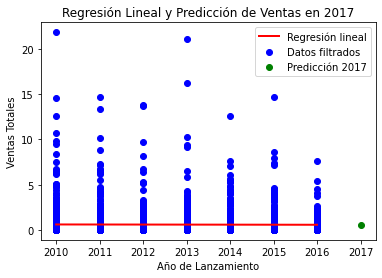

In [36]:
# Graficar los datos filtrados
plt.scatter(filtered_data['year_of_release'], filtered_data['total_sales'], color='blue', label='Datos filtrados')

# Graficar la línea de regresión
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regresión lineal')

# Graficar la predicción para 2017
plt.scatter(year_2017, sales_2017, color='green', label='Predicción 2017')

# Etiquetas y leyenda
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales')
plt.title('Regresión Lineal y Predicción de Ventas en 2017')
plt.legend()

# Mostrar la gráfica
plt.show()

Como podemos observar las ventass esperadas para el 2017 no superan 1 millón de dólares más precisamente $572,506.7.1 dolares

# ¿Cuáles crecen y cuáles se reducen? 

Las platforms que se crecen son las que aun estan vigentes que como obtuvimos en el analisis anterior son  PS4, XOne, WiiU

Las plattforms que se reducen son las que tuvieron un último lanzamiento entre el 2010 y 2016 que son PS3, PSP, X360 y Wii

#  Elige varias plataformas potencialmente rentables.

Las platforms que son potencialmente rentables son las que aún son vigentes:

✔ PS4

✔ WiiU

✔ XOne

# Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma.

<Figure size 864x432 with 0 Axes>

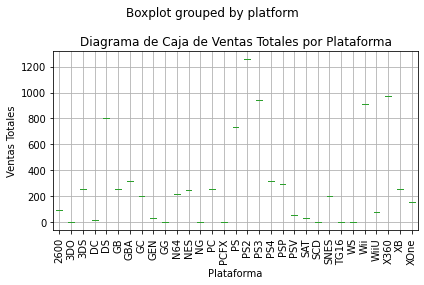

In [37]:

# Agrupar las ventas totales por plataforma y ordenar de mayor a menor
platform_sales = games.groupby('platform')['total_sales'].sum().reset_index()
platform_sales = platform_sales.sort_values(by='total_sales', ascending=False).reset_index(drop=True)

# Crear el diagrama de caja
plt.figure(figsize=(12, 6))
platform_sales.boxplot(column='total_sales', by='platform')

# Agregar etiquetas y título
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales')
plt.title('Diagrama de Caja de Ventas Totales por Plataforma')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

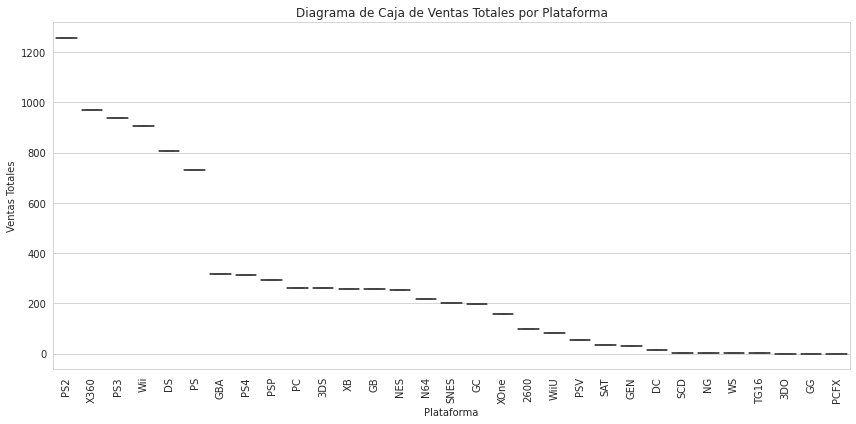

In [38]:

platform_sales = games.groupby('platform')['total_sales'].sum().reset_index()
platform_sales = platform_sales.sort_values(by='total_sales', ascending=False).reset_index(drop=True)

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=platform_sales)

plt.title("Diagrama de Caja de Ventas Totales por Plataforma")
plt.xlabel("Plataforma")
plt.ylabel("Ventas Totales")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

¿Son significativas las diferencias en las ventas? 

Si son significativas las diferencias en las ventas ya que la mayoria de las plataformas con las mayores ventas iniciarion en 1999 y 2000.
La mayoria supera los 200 millones y algunas plataformas son de antes de 1990

# ¿Qué sucede con las ventas promedio en varias plataformas?

 Describe tus hallazgos.

In [39]:

best_platform_sales_h['total_sales_mean'] = best_platform_sales_h['total_sales'] / 4


best_platform_sales_h

,level_0,index,platform,total_sales,cia_sales,total_sales_mean
0,0,16,PS2,1255.77,Sony,313.9425
1,1,28,X360,971.42,Microsoft,242.8550
2,2,17,PS3,939.65,Sony,234.9125
3,3,26,Wii,907.51,Nintendo,226.8775
4,4,4,DS,806.12,Nintendo,201.5300
5,5,15,PS,730.86,Sony,182.7150
6,6,6,GBA,317.85,Nintendo,79.4625
7,7,18,PS4,314.14,Sony,78.5350
8,8,19,PSP,294.05,Sony,73.5125
9,9,13,PC,259.52,PC,64.8800


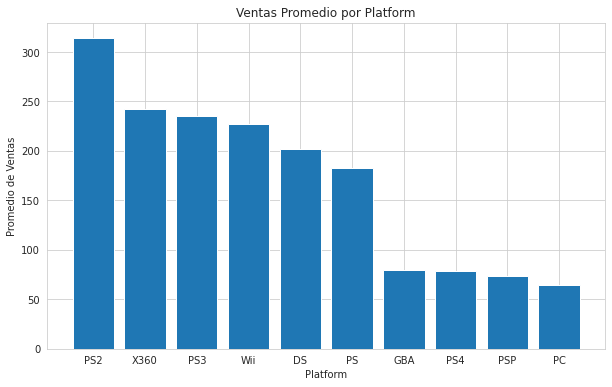

In [40]:
plt.figure(figsize=(10, 6))
plt.bar(best_platform_sales_h['platform'], best_platform_sales_h['total_sales_mean'])
plt.xlabel('Platform')
plt.ylabel('Promedio de Ventas')
plt.title('Ventas Promedio por Platform')
plt.show()

Como podemos observar en la columna de total_sales_mean es el promedio aritmetico de total_sales ya que es la suma de 4 zonas de ventas EU, JP, US y Other por lo tanto se estima que en cada zona de ventas tiene por lo menos las ganancias antes señalas en total_sales_mean de acuerdo a cada platform elegida

# Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección).

In [41]:
# replace los valores 0 de 'critic_score' por "unknown"
games["critic_score"] = games ["critic_score"].replace (0,"unknown")


In [42]:
# Crear un DataFrame agrupado por critic_score
critic_score_groupedX = games.groupby('platform')[['total_sales', 'critic_score']].apply(lambda x: x.reset_index(drop=True))

# Guardar el DataFrame en un archivo CSV
critic_score_groupedX.to_csv('critic_score_grouped.csv', index=True)


In [43]:
plataformas_deseadas = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

games_filtrado = games[games['platform'].isin(plataformas_deseadas)]
critic_score_groupedX = games_filtrado.groupby('platform')[['total_sales', 'critic_score']].apply(lambda x: x.reset_index(drop=True))
critic_score_groupedX.to_csv('critic_score_grouped.csv', index=False)


In [44]:
critic_score_groupedX = games_filtrado.groupby('platform')[['total_sales', 'critic_score']].apply(lambda x: x.loc[x['critic_score'] != 0, 'total_sales'].sum()).reset_index(name='total_sales')

critic_score_groupedX

,platform,total_sales
0,DS,806.12
1,GBA,317.85
2,PC,259.52
3,PS,730.86
4,PS2,1255.77
5,PS3,939.65
6,PS4,314.14
7,PSP,294.05
8,Wii,907.51
9,X360,971.42


In [45]:
user_score_groupedX = games.groupby('platform')[['total_sales', 'user_score']].apply(lambda x: x.reset_index(drop=True))

user_score_groupedX.to_csv('user_score_grouped.csv', index=False)


In [46]:
plataformas_deseadas = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

games_filtrado = games[games['platform'].isin(plataformas_deseadas)]
user_score_groupedX = games_filtrado.groupby('platform')[['total_sales', 'user_score']].apply(lambda x: x.reset_index(drop=True))
user_score_groupedX.to_csv('user_score_grouped.csv', index=False)

In [47]:
user_score_groupedX = games_filtrado.groupby('platform')[['total_sales', 'user_score']].apply(lambda x: x.loc[x['user_score'] != 0, 'total_sales'].sum()).reset_index(name='total_sales')

user_score_groupedX

,platform,total_sales
0,DS,413.57
1,GBA,138.65
2,PC,206.62
3,PS,215.84
4,PS2,999.42
5,PS3,836.75
6,PS4,244.92
7,PSP,198.10
8,Wii,709.63
9,X360,898.64


 # Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. 

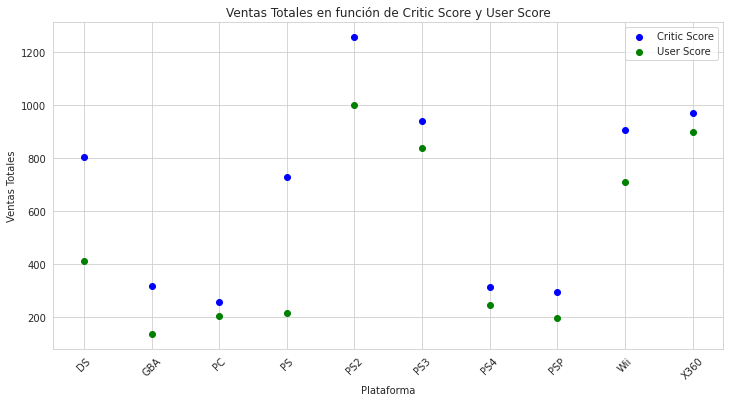

In [48]:
# Crear gráficos de dispersión para critic_score y user_score combinados con total_sales
plt.figure(figsize=(12, 6))

# Gráfico de dispersión para critic_score
plt.scatter(critic_score_groupedX['platform'], critic_score_groupedX['total_sales'], color='blue', label='Critic Score')

# Gráfico de dispersión para user_score
plt.scatter(user_score_groupedX['platform'], user_score_groupedX['total_sales'], color='green', label='User Score')

# Personalizar el gráfico
plt.title('Ventas Totales en función de Critic Score y User Score')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

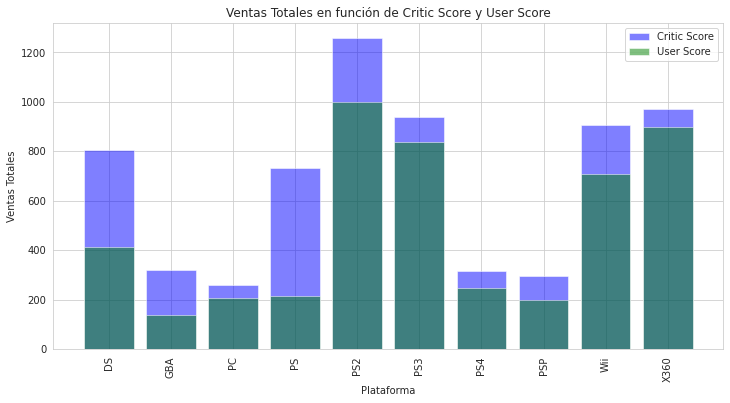

In [49]:
# Crear gráficos de barras para critic_score y user_score combinados con total_sales
plt.figure(figsize=(12, 6))

# Gráfico de barras para critic_score
critic_score_groupedX = games_filtrado.groupby('platform')[['total_sales', 'critic_score']].apply(lambda x: x.loc[x['critic_score'] != 0, 'total_sales'].sum()).reset_index(name='total_sales')
plt.bar(critic_score_groupedX['platform'], critic_score_groupedX['total_sales'], color='blue', alpha=0.5, label='Critic Score')

# Gráfico de barras para user_score
user_score_groupedX = games_filtrado.groupby('platform')[['total_sales', 'user_score']].apply(lambda x: x.loc[x['user_score'] != 0, 'total_sales'].sum()).reset_index(name='total_sales')
plt.bar(user_score_groupedX['platform'], user_score_groupedX['total_sales'], color='green', alpha=0.5, label='User Score')

# Personalizar el gráfico
plt.title('Ventas Totales en función de Critic Score y User Score')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

# Saca conclusiones.

Como podemos observar los critic_score tiene la suma total de "total_sales" en relacion a sus calificación y con relación a los user_score la diferencia se determina a continuación de forma más estadistica.

In [50]:
# Crear el DataFrame user_score
user_score_groupedX = games_filtrado.groupby('platform')[['total_sales', 'user_score']].apply(lambda x: x.loc[x['user_score'] != 0, 'total_sales'].sum()).reset_index(name='user_score')

# Crear el DataFrame critic_score
critic_score_groupedX = games_filtrado.groupby('platform')[['total_sales', 'critic_score']].apply(lambda x: x.loc[x['critic_score'] != 0, 'total_sales'].sum()).reset_index(name='critic_score')

# Combinar los DataFrames utilizando merge
merged_score = pd.merge(user_score_groupedX, critic_score_groupedX, on='platform', how='outer', suffixes=('_user', '_critic'))

# Calcular la diferencia total entre user_score y critic_score
merged_score['total_difference'] = merged_score['critic_score'] - merged_score['user_score']
merged_score["total_dif_porc"] = (merged_score['total_difference']/merged_score['critic_score'])*100 

# Mostrar el DataFrame con las puntuaciones de usuario, crítica y la diferencia total
print(merged_score)
print()
print("***************************************************************************")
print()
print (f"Es el porcentaje del promedio de ventas {(merged_score['total_dif_porc'].sum()/10):.4f} % de acuerdo a la diferencia de user y critic")
print()

  platform  user_score  critic_score  total_difference  total_dif_porc
0       DS      413.57        806.12            392.55       48.696224
1      GBA      138.65        317.85            179.20       56.378795
2       PC      206.62        259.52             52.90       20.383785
3       PS      215.84        730.86            515.02       70.467668
4      PS2      999.42       1255.77            256.35       20.413770
5      PS3      836.75        939.65            102.90       10.950886
6      PS4      244.92        314.14             69.22       22.034762
7      PSP      198.10        294.05             95.95       32.630505
8      Wii      709.63        907.51            197.88       21.804718
9     X360      898.64        971.42             72.78        7.492125

***************************************************************************

Es el porcentaje del promedio de ventas 31.1253 % de acuerdo a la diferencia de user y critic



Es muy interante porque al cambiar el 0 con unknown en la columna de critic_score nos da los totales con relación a la columna de 'total_sales' por lo tanto podemos inferir que las criticas las toma en cuenta la industria para determinar sus ventas en comparación con las calificaciones que le dan los usuarios.

# ⌛ 🔎 Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

In [51]:
best_n_games_sales = games.groupby(['name', 'platform'])['total_sales'].sum().reset_index()
plataformas_deseadas = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']
best_n_games_sales= best_n_games_sales[best_n_games_sales['platform'].isin(plataformas_deseadas)]
display(best_n_games_sales)
best_n_games_sales['name'].count()


,name,platform,total_sales
4,Frozen: Olaf's Quest,DS,0.51
6,Tales of Xillia 2,PS3,0.84
7,'98 Koshien,PS,0.40
8,.hack//G.U. Vol.1//Rebirth,PS2,0.17
9,.hack//G.U. Vol.2//Reminisce,PS2,0.23
...,...,...,...
16705,uDraw Studio,Wii,2.42
16706,uDraw Studio: Instant Artist,Wii,0.17
16707,uDraw Studio: Instant Artist,X360,0.02
16708,wwe Smackdown vs. Raw 2006,PS2,3.00


12815

In [52]:
best_n_games_sales = best_n_games_sales.groupby(['name', 'platform'])['total_sales'].sum().reset_index()
plataformas_deseadas = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']
best_n_games_sales = best_n_games_sales[best_n_games_sales['platform'].isin(plataformas_deseadas)]
best_n_games_sales


,name,platform,total_sales
0,Frozen: Olaf's Quest,DS,0.51
1,Tales of Xillia 2,PS3,0.84
2,'98 Koshien,PS,0.40
3,.hack//G.U. Vol.1//Rebirth,PS2,0.17
4,.hack//G.U. Vol.2//Reminisce,PS2,0.23
...,...,...,...
12810,uDraw Studio,Wii,2.42
12811,uDraw Studio: Instant Artist,Wii,0.17
12812,uDraw Studio: Instant Artist,X360,0.02
12813,wwe Smackdown vs. Raw 2006,PS2,3.00


In [53]:
# Obtener los nombres duplicados
duplicated_names = best_n_games_sales['name'][best_n_games_sales['name'].duplicated()].unique()
print("Nombres duplicados:", duplicated_names)
best_name_d =len(duplicated_names)
print (f"Número: {best_name_d} de juegos Duplicados de acuerdo con la variable best_n_games_sales")

Nombres duplicados: ['007: Quantum of Solace' '11eyes: CrossOver'
 '2010 FIFA World Cup South Africa' ... "nail'd"
 'pro evolution soccer 2011' 'uDraw Studio: Instant Artist']
Número: 1908 de juegos Duplicados de acuerdo con la variable best_n_games_sales


COMO PODEMOS OBSERVA SON DEMACIADOS JUEGOS POR LO TANTO VAMOS A REDUCIRLOS A LOS MEJORES 15 EN BASE A SUS VENTAS

In [54]:
#display(duplicated_names[:15])

In [55]:
# Obtener los nombres duplicados
duplicated_names = best_n_games_sales['name'][best_n_games_sales['name'].duplicated()].unique()

# Crear un DataFrame para almacenar la suma total de ventas por juego
total_sales_per_game = pd.DataFrame(columns=['name', 'total_sales', 'platform_count'])

# Iterar sobre los nombres y calcular totales de ventas por plataforma
for name in duplicated_names:
    total_sales = 0
    platforms = best_n_games_sales[best_n_games_sales['name'] == name]['platform'].unique()
    
    if len(platforms) >= 2:
        for platform in platforms:
            total_sales += best_n_games_sales[(best_n_games_sales['name'] == name) & (best_n_games_sales['platform'] == platform)]['total_sales'].sum()
        
        total_sales_per_game = total_sales_per_game.append({'name': name, 'total_sales': total_sales, 'platform_count': len(platforms)}, ignore_index=True)

# Obtener los 15 juegos con las mayores sumas de ventas y al menos dos plataformas
top_15_games = total_sales_per_game[total_sales_per_game['platform_count'] >= 2].nlargest(15, 'total_sales')

# Imprimir los resultados
for index, row in top_15_games.iterrows():
    display(f"Nombre del juego: {row['name']} - Ventas totales: {row['total_sales']} - Plataformas: {row['platform_count']}")


'Nombre del juego: Grand Theft Auto V - Ventas totales: 51.11 - Plataformas: 4'

'Nombre del juego: Call of Duty: Black Ops - Ventas totales: 30.819999999999997 - Plataformas: 5'

'Nombre del juego: Call of Duty: Modern Warfare 3 - Ventas totales: 30.6 - Plataformas: 4'

'Nombre del juego: Call of Duty: Black Ops II - Ventas totales: 28.990000000000002 - Plataformas: 3'

'Nombre del juego: Call of Duty: Modern Warfare 2 - Ventas totales: 24.97 - Plataformas: 3'

'Nombre del juego: Call of Duty: Ghosts - Ventas totales: 24.119999999999997 - Plataformas: 4'

'Nombre del juego: Grand Theft Auto IV - Ventas totales: 22.369999999999997 - Plataformas: 3'

'Nombre del juego: Grand Theft Auto: San Andreas - Ventas totales: 21.89 - Plataformas: 3'

'Nombre del juego: The Elder Scrolls V: Skyrim - Ventas totales: 20.39 - Plataformas: 4'

'Nombre del juego: Minecraft - Ventas totales: 18.77 - Plataformas: 3'

'Nombre del juego: Call of Duty: Black Ops 3 - Ventas totales: 18.279999999999998 - Plataformas: 4'

'Nombre del juego: Call of Duty 4: Modern Warfare - Ventas totales: 18.2 - Plataformas: 4'

'Nombre del juego: Battlefield 3 - Ventas totales: 17.27 - Plataformas: 3'

'Nombre del juego: Call of Duty: Advanced Warfare - Ventas totales: 16.71 - Plataformas: 4'

'Nombre del juego: Guitar Hero III: Legends of Rock - Ventas totales: 16.369999999999997 - Plataformas: 5'

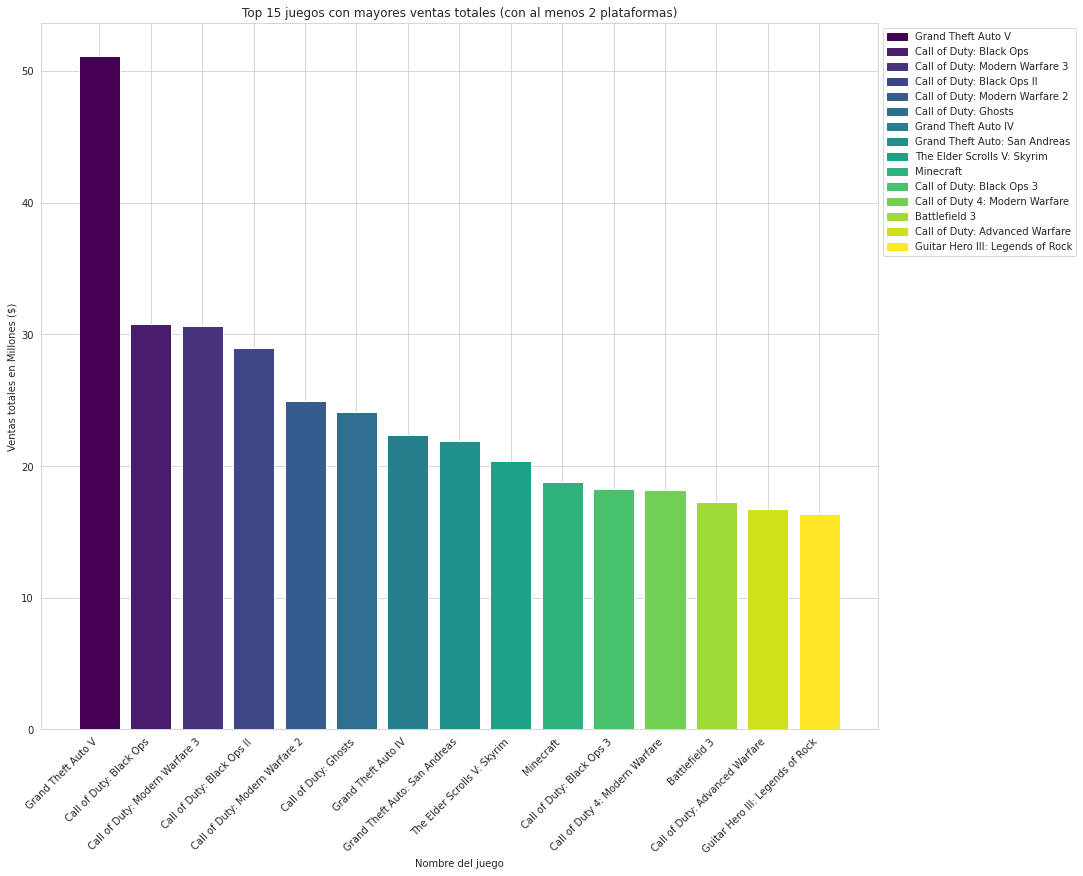

In [56]:
# Crear un gráfico de barras con diferentes colores para cada 'name'
fig, ax = plt.subplots(figsize=(15, 13))
colors = plt.cm.viridis(np.linspace(0, 1, len(top_15_games)))
barsh = ax.bar(top_15_games['name'], top_15_games['total_sales'], color=colors)

# Agregar etiquetas y título
plt.xlabel('Nombre del juego')
plt.ylabel('Ventas totales en Millones ($)')
plt.title('Top 15 juegos con mayores ventas totales (con al menos 2 plataformas)')

# Rotar las etiquetas del eje x
plt.xticks(rotation=45, ha='right')

# Crear una leyenda personalizada
handles = [plt.Rectangle((0,0),1,1, color=colors[i]) for i in range(len(top_15_games))]
labels = top_15_games['name']
plt.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


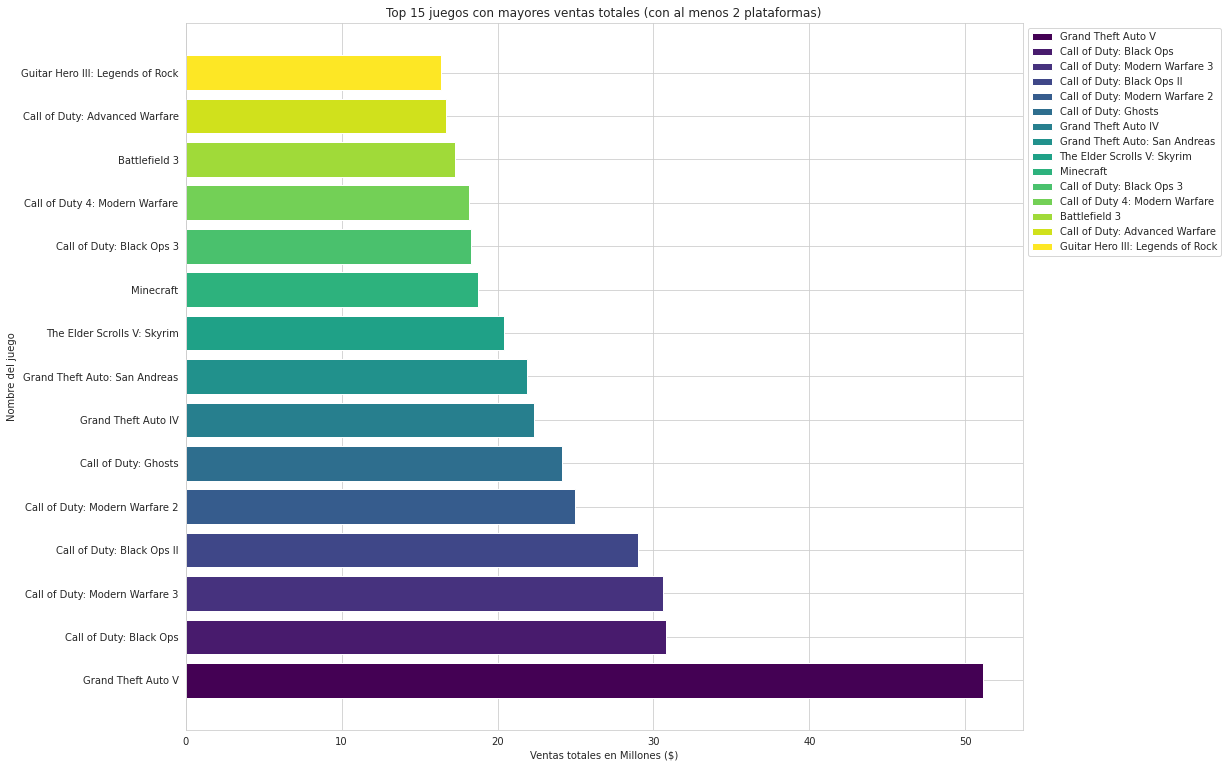

In [57]:
# Crear un gráfico de barras horizontales con diferentes colores para cada 'name'
fig, ax = plt.subplots(figsize=(15, 13))
colors = plt.cm.viridis(np.linspace(0, 1, len(top_15_games)))
for i, (name, total_sales) in enumerate(zip(top_15_games['name'], top_15_games['total_sales'])):
    ax.barh(name, total_sales, color=colors[i], label=name)

# Agregar etiquetas y título
plt.xlabel('Ventas totales en Millones ($)')
plt.ylabel('Nombre del juego')
plt.title('Top 15 juegos con mayores ventas totales (con al menos 2 plataformas)')

# Mostrar la leyenda
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()



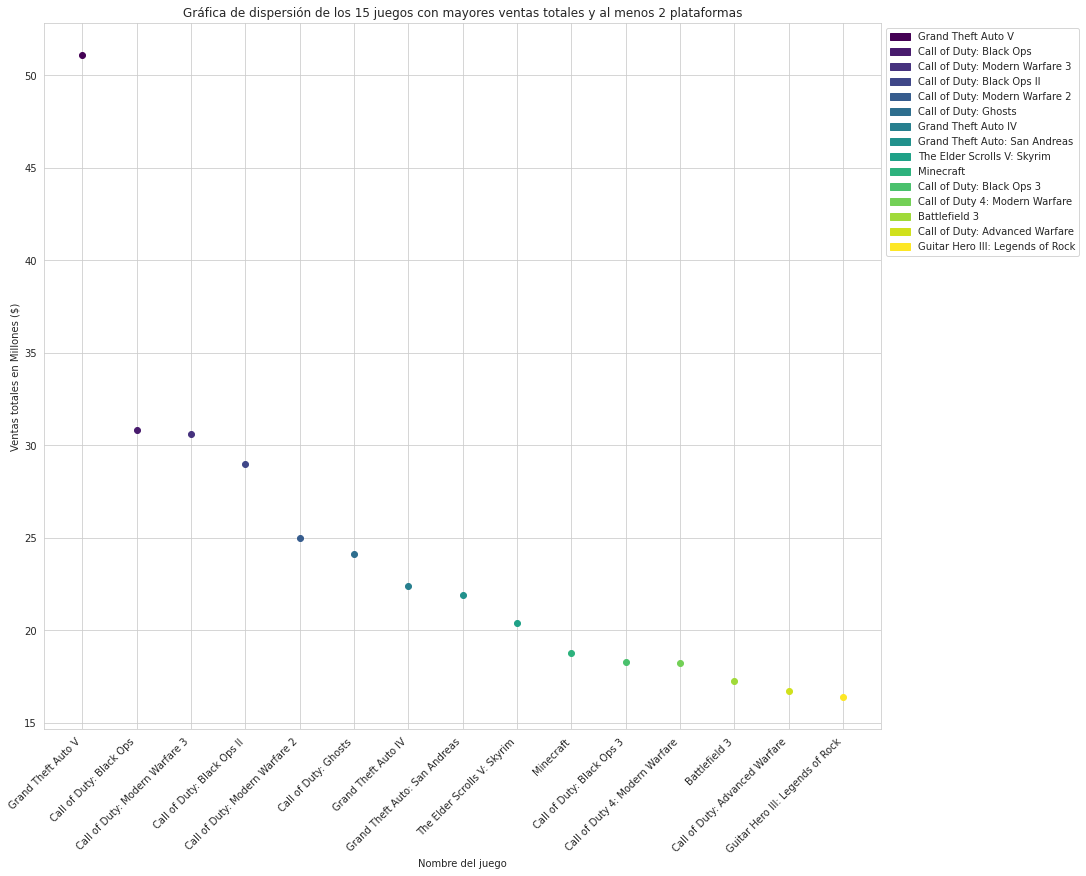

In [58]:


# Filtrar los 15 juegos con las mayores ventas totales y al menos dos plataformas
top_15_games = total_sales_per_game[total_sales_per_game['platform_count'] >= 2].nlargest(15, 'total_sales')

# Crear la gráfica de dispersión
fig, ax = plt.subplots(figsize=(15, 13))
colors = plt.cm.viridis(np.linspace(0, 1, len(top_15_games)))

for i, (name, total_sales) in enumerate(zip(top_15_games['name'], top_15_games['total_sales'])):
    ax.scatter(name, total_sales, color=colors[i], label=name)

# Agregar etiquetas y título
plt.xlabel('Nombre del juego')
plt.ylabel('Ventas totales en Millones ($)')
plt.title('Gráfica de dispersión de los 15 juegos con mayores ventas totales y al menos 2 plataformas')

plt.xticks(rotation=45, ha='right')


# Mostrar la leyenda
handles = [plt.Rectangle((0,0),1,1, color=colors[i]) for i in range(len(top_15_games))]
labels = top_15_games['name']
plt.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()



# 🔎 Echa un vistazo a la distribución general de los juegos por género.

¿Qué se puede decir de los géneros más rentables?

In [59]:
games["genre"] = games ["genre"].replace (0,"unknown")
dist_genre = games.groupby('genre')['platform'].value_counts().reset_index(name='genre_count')
all_genre = ['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', "unknown"]
best_dist_genre = dist_genre[dist_genre['genre'].isin(all_genre)]
genre_totals = best_dist_genre.groupby('genre')['genre_count'].sum().reset_index()
genre_totals = genre_totals.sort_values(by='genre_count', ascending=False)
genre_totals

,genre,genre_count
0,Action,3369
10,Sports,2348
3,Misc,1750
7,Role-Playing,1498
8,Shooter,1323
1,Adventure,1303
6,Racing,1249
4,Platform,888
9,Simulation,873
2,Fighting,849


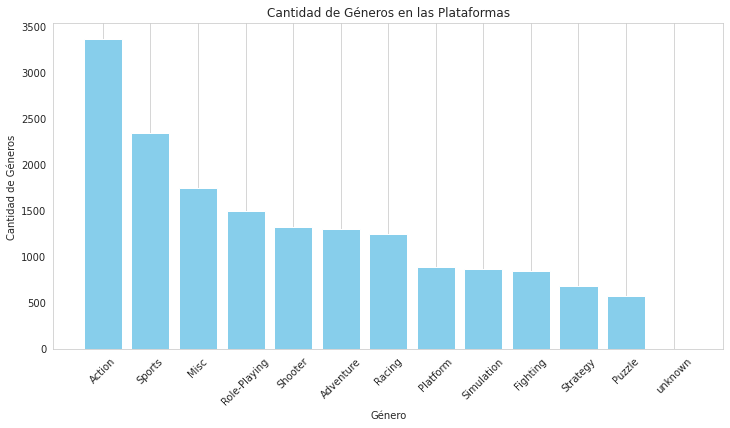

In [60]:
genre_totals['genre'] = genre_totals['genre'].astype(str)
genre_totals = genre_totals.sort_values(by='genre_count', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(genre_totals['genre'], genre_totals['genre_count'], color='skyblue')
plt.xlabel('Género')
plt.ylabel('Cantidad de Géneros ')
plt.title('Cantidad de Géneros en las Plataformas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Como podemos observar los generos de mayores titulos son Action, Sports y Misc

# 🔎 ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [61]:
sales_genre = games.groupby('genre')['total_sales'].sum().reset_index(name='genre_total_sales')
all_genre = ['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', "unknown"]
best_sales_genre = sales_genre[sales_genre['genre'].isin(all_genre)]
sales_genre_totals = best_sales_genre.groupby('genre')['genre_total_sales'].sum().reset_index()
genre_totals_sales = sales_genre_totals.sort_values(by='genre_total_sales', ascending=False)
genre_totals_sales

,genre,genre_total_sales
0,Action,1744.17
10,Sports,1331.27
8,Shooter,1052.45
7,Role-Playing,934.56
4,Platform,827.77
3,Misc,802.51
6,Racing,728.67
2,Fighting,447.53
9,Simulation,389.97
5,Puzzle,242.57


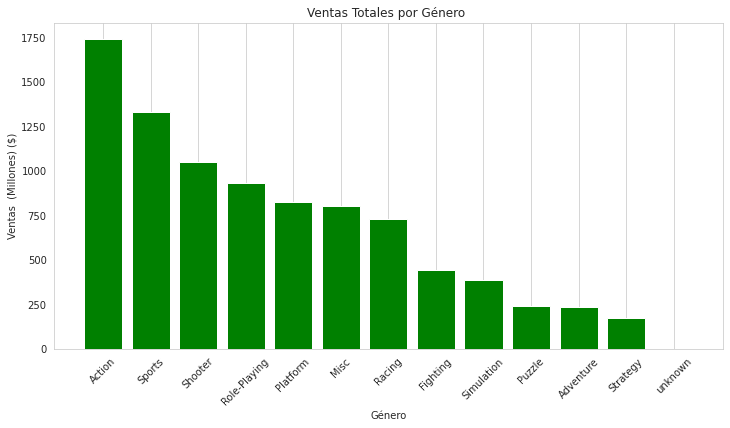

In [62]:
genre_totals_sales['genre'] = genre_totals_sales['genre'].astype(str)
genre_totals_sales = genre_totals_sales.sort_values(by='genre_total_sales', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(genre_totals_sales['genre'], genre_totals_sales['genre_total_sales'], color='green')
plt.xlabel('Género')
plt.ylabel('Ventas  (Millones) ($)')
plt.title('Ventas Totales por Género ')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Las ventas($) conforme a al género son muy diferentes a la cantidad de titulos que se lanzas para las plataformas repiten Action, Sports con la excepsión de Shooter y Misc tiene el lugar numero 6 con diferencia de de Shooter que en el analisis anterior tenia el lugar 5.

Con esto podemos decir que no importa el numero de videojuegos de salgan al mercado la última palabra la tiene los jugadores.

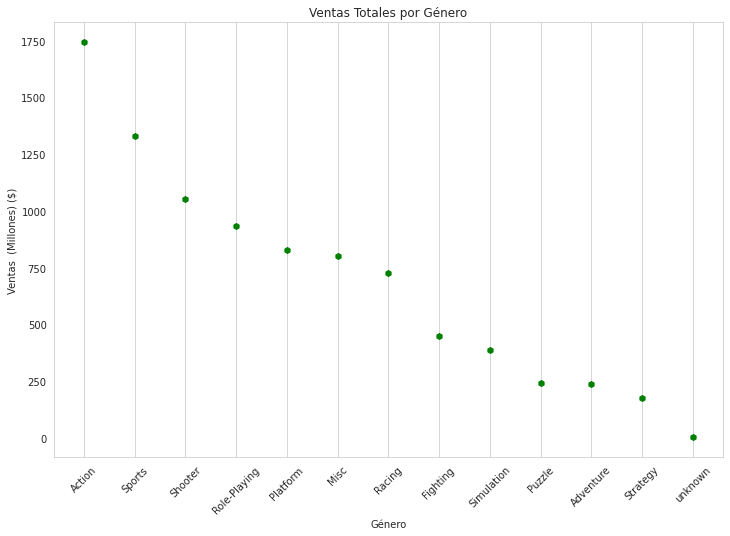

In [63]:
# Crear un gráfico de dispersión (scatter plot)
plt.figure(figsize=(12, 8))
plt.scatter(genre_totals_sales['genre'], genre_totals_sales['genre_total_sales'], color='green', marker='h')
plt.xlabel('Género')
plt.ylabel('Ventas  (Millones) ($)')
plt.title('Ventas Totales por Género')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.36)
plt.show()

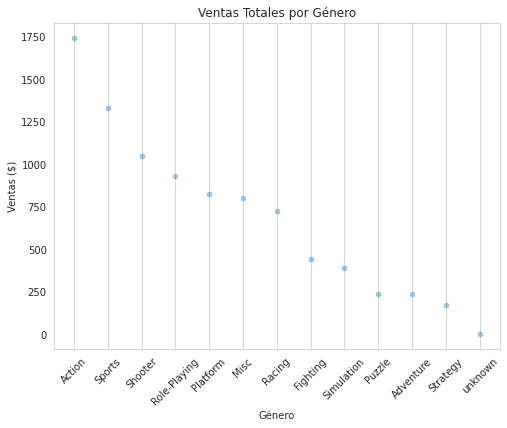

In [64]:
genre_totals_sales.plot(x='genre', y='genre_total_sales', kind='scatter', 
                       title='Ventas Totales por Género',
                       figsize=(8, 6),
                       xlabel='Género',
                       ylabel='Ventas ($)',
                       alpha=0.36)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.36)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Muy buen trabajo con el análisis exploratorio de los datos. Desarrollaste gráficas de box-plots para analizar ventas de las plataformas que más venden, gráficas para identificar los juegos más populares en las distintas plataformas, gráficas de barras para analizar los géneros de juegos más populares y agregaste la conclusión y la interpretación de cada uno de estos resultados.   

</div>


 <div class="alert alert-block alert-danger">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Solamente te recomiendo desarrollar una gráfica de scatter plots para ver la relación entre las score de usuarios y de los criticos respecto a las ventas. En este sentido en el eje de las X tendrías las scores y en el de las Y las ventas globales  

</div>

#  Paso 4. Crea un perfil de usuario para cada región

Para cada región (NA, UE, JP) determina:

💪Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

💪Los cinco géneros principales. Explica la diferencia.

💪Si las clasificaciones de ESRB afectan a las ventas en regiones individuales

In [65]:
regions = ['na', 'jp', 'eu']

# Función para obtener las 5 plataformas principales de cada región
def get_top_platforms(region):
    top_platforms = games.groupby('platform')[region + '_sales'].sum().sort_values(ascending=False).head(5)
    return top_platforms

# Función para obtener los 5 géneros principales de cada región
def get_top_genres(region):
    top_genres = games.groupby('genre')[region + '_sales'].sum().sort_values(ascending=False).head(5)
    return top_genres

# Función para analizar la influencia de las clasificaciones de ESRB en las ventas de cada región
def analyze_esrb_influence(region):
    esrb_influence = games.groupby('rating')[region + '_sales'].sum().describe()
    return esrb_influence


# Plataformas por Región

In [66]:
for region in regions:
    print(f"Region: {region}")
# Obtener las 5 plataformas principales
    top_platforms = get_top_platforms(region)
    print('---------------------------------')
    print(f"Top 5 plataformas principales en {region}: {top_platforms}")
    print("\n")

Region: na
---------------------------------
Top 5 plataformas principales en na: platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64


Region: jp
---------------------------------
Top 5 plataformas principales en jp: platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


Region: eu
---------------------------------
Top 5 plataformas principales en eu: platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64




Al comparar las plataformas principales en cada región, podemos observar variaciones significativas en las preferencias de los usuarios. Por ejemplo, la PS2 es una de las principales plataformas en EU y JP, mientras que la X360 lidera en NA. Estas diferencias reflejan las preferencias de los consumidores en cada región y pueden influir en las estrategias de mercado y desarrollo de juegos para adaptarse a las preferencias locales.

# Gráfica de las Principales Plataformas por Región

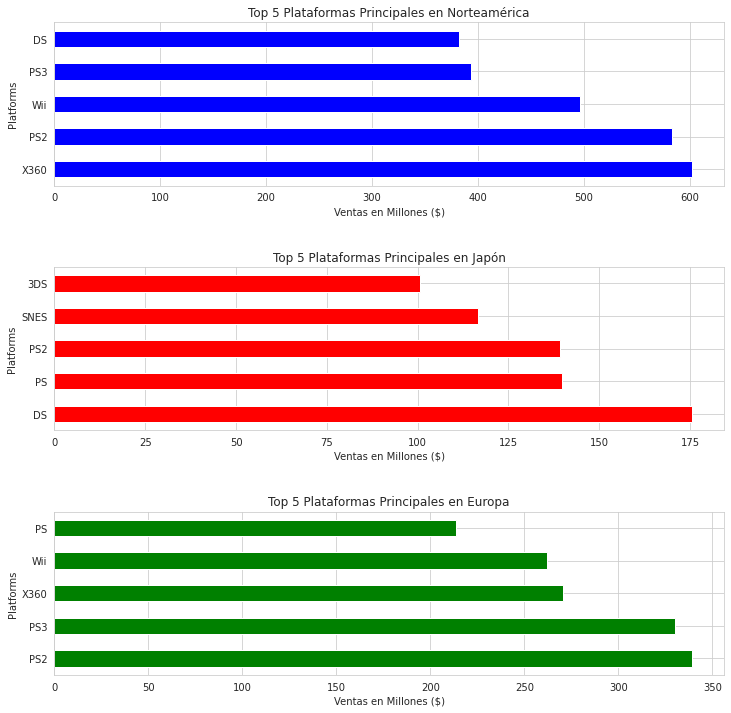

In [67]:

fig, axes = plt.subplots(3, 1, figsize=(12, 12))

colors = {'na': 'blue', 'jp': 'red', 'eu': 'green'}
reg_nam = {'na': 'Norteamérica', 'jp': 'Japón', 'eu': 'Europa'}


for i, region in enumerate(regions):
    top_platforms = get_top_platforms(region)
    
    top_platforms.plot(kind='barh', subplots=True, ax=axes[i], color=colors[region])
    
    axes[i].set_title(f"Top 5 Plataformas Principales en {reg_nam[region]}")
    axes[i].set_xlabel("Ventas en Millones ($)")
    axes[i].set_ylabel("Platforms")
    
plt.subplots_adjust(hspace=0.5)  # Ajustar el espaciado vertical entre las subplots
plt.show()


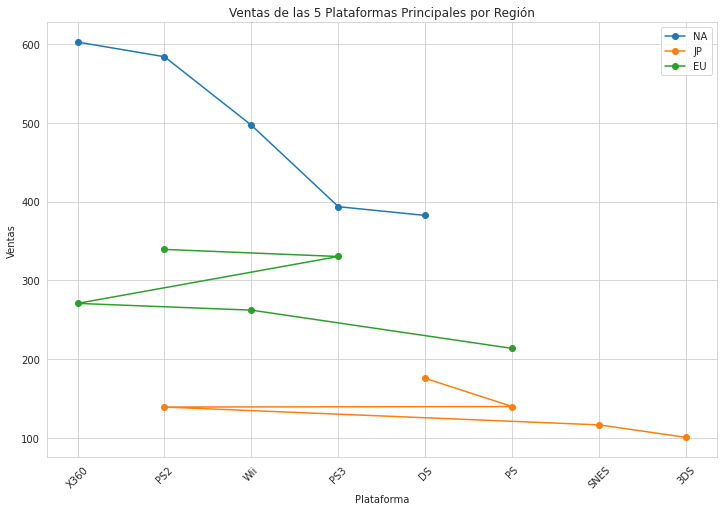

In [68]:
plt.figure(figsize=(12,8))


for region in regions:
    top_platforms = get_top_platforms(region)
    plt.plot(top_platforms.index, top_platforms.values, marker='o', label=region.upper())

# Personalizar la gráfica
plt.title('Ventas de las 5 Plataformas Principales por Región')
plt.xlabel('Plataforma')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

# Principales Generos por Región

In [69]:
for region in regions:
    print(f"Region: {region}")
    # Obtener los 5 géneros principales
    top_genres = get_top_genres(region)
    print('---------------------------------')
    print(f"Top 5 géneros principales en {region}: {top_genres}")
    print("\n")

Region: na
---------------------------------
Top 5 géneros principales en na: genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64


Region: jp
---------------------------------
Top 5 géneros principales en jp: genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


Region: eu
---------------------------------
Top 5 géneros principales en eu: genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64




Las principales diferencias que se observan son:

✨El género de Rol (RPG) es uno de los más importantes en Japón, mientras que no aparece entre los principales en Norteamérica y Europa.

✨Los géneros de Action tienen una mayor presencia en Europa y Norteamérica, mientras que no es tan relevante en Japón.

✨El género de Platform se encuentra entre los principales generos en Norteamérica y Japón, pero no en Europa.

✨Los géneros de Action, Sports y Misc son los más importantes en las tres regiones.

# Gráfica de las Principales Genero por Región

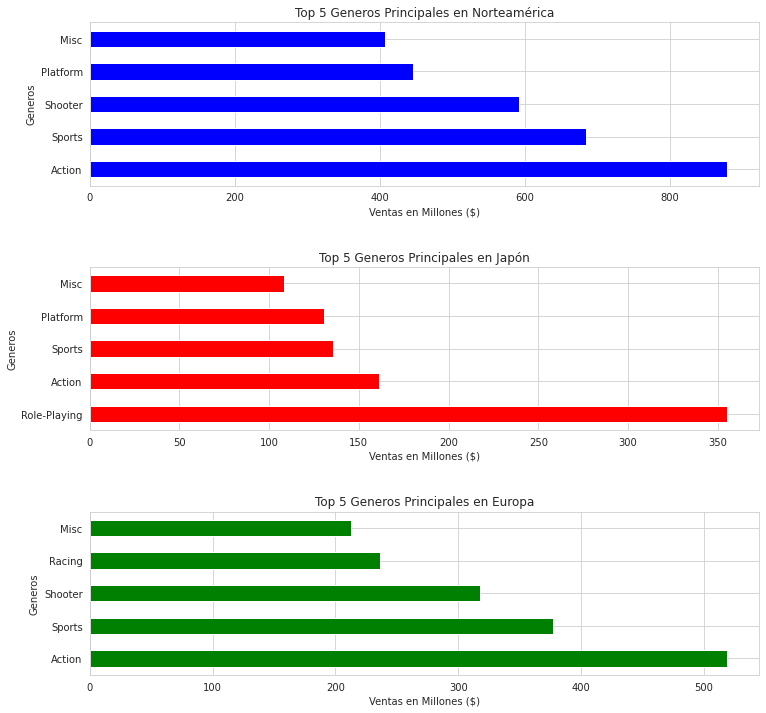

In [70]:
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

colors = {'na': 'blue', 'jp': 'red', 'eu': 'green'}
reg_nam = {'na': 'Norteamérica', 'jp': 'Japón', 'eu': 'Europa'}


for i, region in enumerate(regions):
    top_genres = get_top_genres(region)
    
    top_genres.plot(kind='barh', subplots=True, ax=axes[i], color=colors[region])
    
    axes[i].set_title(f"Top 5 Generos Principales en {reg_nam[region]}")
    axes[i].set_xlabel("Ventas en Millones ($)")
    axes[i].set_ylabel("Generos")
    
plt.subplots_adjust(hspace=0.5)  # Ajustar el espaciado vertical entre las subplots
plt.show()


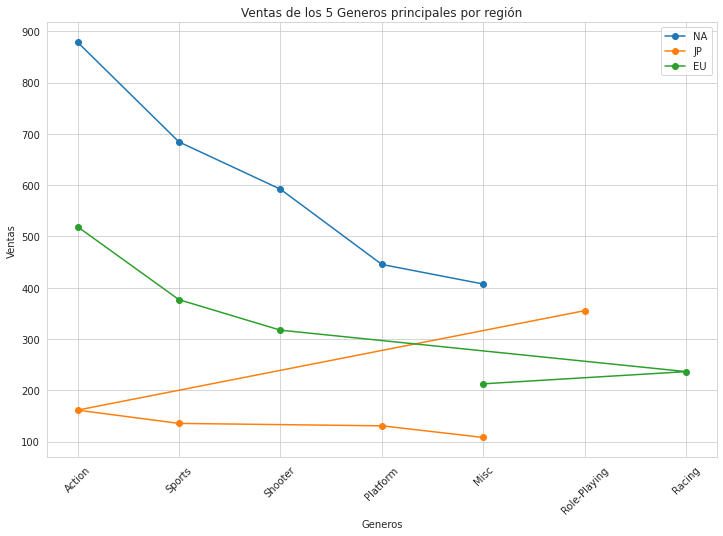

In [71]:
plt.figure(figsize=(12,8))


for region in regions:
    top_genres = get_top_genres(region)
    plt.plot(top_genres.index, top_genres.values, marker='o', label=region.upper())

# Personalizar la gráfica
plt.title('Ventas de los 5 Generos principales por región')
plt.xlabel('Generos')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

# Las clasificaciones de ESRB en las ventas de cada región

In [72]:
for region in regions:
    print(f"Region: {region}")
    # Analizar la influencia de las clasificaciones de ESRB
    esrb_influence = analyze_esrb_influence(region)
    print('---------------------------------')
    print(f"Influencia de las clasificaciones de ESRB en las ventas en {region}: {esrb_influence}")
    print("\n")

Region: na
---------------------------------
Influencia de las clasificaciones de ESRB en las ventas en na: count       9.000000
mean      489.150000
std       539.027871
min         0.000000
25%         1.530000
50%       353.320000
75%       759.750000
max      1292.990000
Name: na_sales, dtype: float64


Region: jp
---------------------------------
Influencia de las clasificaciones de ESRB en las ventas en jp: count      9.000000
mean     144.152222
std      271.521720
min        0.000000
25%        0.000000
50%       40.200000
75%      151.400000
max      841.960000
Name: jp_sales, dtype: float64


Region: eu
---------------------------------
Influencia de las clasificaciones de ESRB en las ventas en eu: count      9.000000
mean     269.407778
std      291.577436
min        0.080000
25%        0.270000
50%      188.520000
75%      483.970000
max      710.250000
Name: eu_sales, dtype: float64




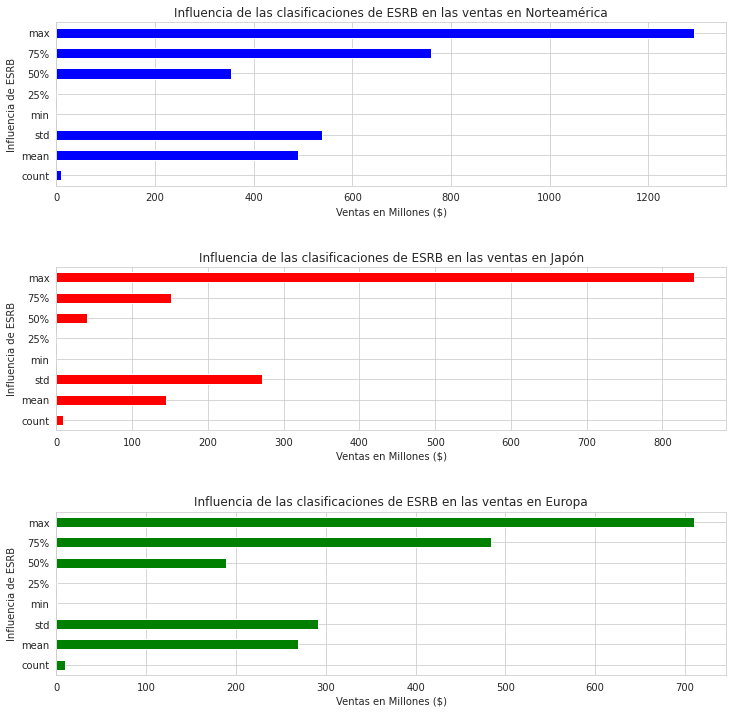

In [73]:
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

colors = {'na': 'blue', 'jp': 'red', 'eu': 'green'}
reg_nam = {'na': 'Norteamérica', 'jp': 'Japón', 'eu': 'Europa'}


for i, region in enumerate(regions):
    esrb_influence = analyze_esrb_influence(region)
    
    esrb_influence.plot(kind='barh', subplots=True, ax=axes[i], color=colors[region])
    
    axes[i].set_title(f"Influencia de las clasificaciones de ESRB en las ventas en {reg_nam[region]}")
    axes[i].set_xlabel("Ventas en Millones ($)")
    axes[i].set_ylabel("Influencia de ESRB")
    
plt.subplots_adjust(hspace=0.5)  # Ajustar el espaciado vertical entre las subplots

plt.show()

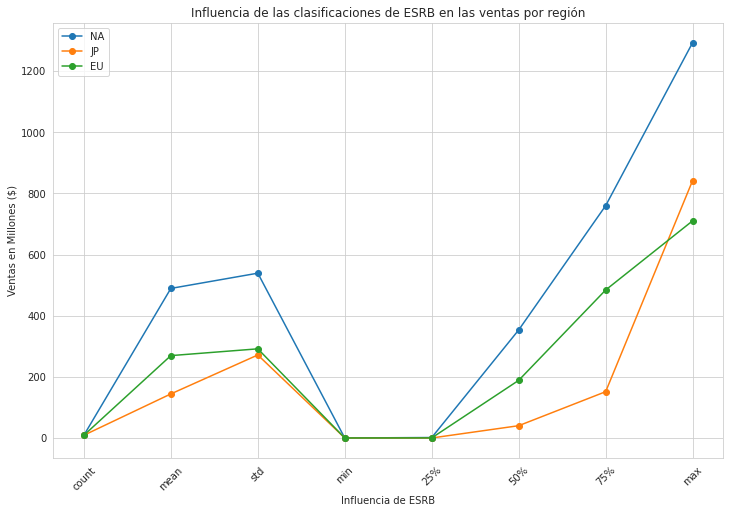

In [74]:
plt.figure(figsize=(12,8))

for region in regions:
    esrb_influence = analyze_esrb_influence(region)
    plt.plot(esrb_influence.index, esrb_influence.values, marker='o', label=region.upper())
    
# Personalizar la gráfica

plt.title('Influencia de las clasificaciones de ESRB en las ventas por región')
plt.xlabel('Influencia de ESRB')
plt.ylabel('Ventas en Millones ($)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Excelente! Con este análisis por región ayuda a complementar el análisis general anterior y a hacer zoom a los resultados por cada una de las regiones.   Solamente te recomiendo en esta sección también agregar gráficas que ayuden a visualizar los resultados.

</div>

# Paso 5. Prueba las siguientes hipótesis:

## Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [75]:
plataformas_02 = ['XOne', 'PC']
games_filtrado = games[games['platform'].isin(plataformas_02)]

xone_game = games_filtrado[games_filtrado['platform'] == 'XOne']
pc_game = games_filtrado[games_filtrado['platform'] == 'PC']


games_score_02 = games_filtrado.groupby('platform')['user_score'].mean()

games_score_02xone = xone_game['user_score'].to_frame().describe().drop('count')

games_score_02pc = pc_game['user_score'].to_frame().describe().drop('count')


# Imprimir los resultados
print("Promedio de user_score para PC y XOne:")
print(games_score_02)
print("********************************************************************************")
print()
print("\nDescripción del user_score para XOne:")
print(games_score_02xone)
print("********************************************************************************")
print()
print("\nDescripción del user_score para PC:")
print(games_score_02pc)

Promedio de user_score para PC y XOne:
platform
PC      5.583265
XOne    4.805263
Name: user_score, dtype: float64
********************************************************************************


Descripción del user_score para XOne:
      user_score
mean    4.805263
std     3.111794
min     0.000000
25%     0.000000
50%     6.000000
75%     7.200000
max     9.200000
********************************************************************************


Descripción del user_score para PC:
      user_score
mean    5.583265
std     3.180768
min     0.000000
25%     3.800000
50%     6.900000
75%     8.000000
max     9.300000


Tiene mejores calificacione en Promedio la Plataforma PC al final use la función describe() por que nos da más valores para que pueda realizar la función la libreria de from scipy import stats as st y que los nos muestre un NaN,  ya se hizo los arreglos pertinentes con .to_frame().describe().drop('count).

## Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [76]:
genre_02 = ['Action', 'Sports']

genre_filtrado = games[games['genre'].isin(genre_02)]

# Convertir 'user_score' a tipo numérico
genre_filtrado.loc[:, 'user_score'] = pd.to_numeric(genre_filtrado['user_score'])

action_genre = genre_filtrado[genre_filtrado['genre'] == 'Action']
sports_genre = genre_filtrado[genre_filtrado['genre'] == 'Sports']


# Calcular el promedio de 'user_score' para 'Acción' y 'Deportes'
genre_score_02 = genre_filtrado.groupby('genre')['user_score'].mean()
genre_score_02a = action_genre['user_score'].to_frame().describe().drop('count')
genre_score_02s = sports_genre['user_score'].to_frame().describe().drop('count')


# Imprimir los resultados
print("Promedio de user_score para Acción y Deportes:")
print(genre_score_02)
print("********************************************************************************")
print()
print("\nDescripción del user_score para Acción:")
print(genre_score_02a)
print("********************************************************************************")
print()
print("\nDescripción del user_score para Sports:")
print(genre_score_02s)

Promedio de user_score para Acción y Deportes:
genre
Action    3.831671
Sports    3.270102
Name: user_score, dtype: float64
********************************************************************************


Descripción del user_score para Acción:
      user_score
mean    3.831671
std     3.667981
min     0.000000
25%     0.000000
50%     4.800000
75%     7.500000
max     9.500000
********************************************************************************


Descripción del user_score para Sports:
      user_score
mean    3.270102
std     3.646170
min     0.000000
25%     0.000000
50%     0.000000
75%     7.200000
max     9.500000


/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Tiene mejores calificacione en Promedio el Genero  Action al final use la función describe() por que nos da más valores para que pueda realizar la función, la libreria de from scipy import stats as st y que los nos muestre un NaN, ya se hizo los arreglos pertinentes con .to_frame().describe().drop('count).

<div class="alert alert-block alert-danger">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Para hacer la prueba hipótesis primero debemos de considerar que la hipótesis nula es que las medias entre ambos plataformas es igual y la hipótesis alternativa es que no podemos asegurar que son iguales. Para probar esto hacemos uso de la función st.ttest_ind() donde adentro colocamos los scores medios de los que tienen las plataformas y equal_var = False dado que no podemos asegurar que las varianzas son iguales. Quedarías algo así: 
    st.ttest_ind(sample_1, sample_2, equal_var = False) 
    
Con esto nos arroja el valor de valor p para determinar si rechazamos la hipótesis nula. 
</div>

En promedio tiene mejores calificaciones los juegos de Acción que los de Deporte de acuerdo a los user_score

# Establece tu mismo el valor de umbral alfa valor de alpha (α) 

El valor de umbral alpha es el nivel de significancia que se elige para determinar si se rechaza la hipótesis nula. Comúnmente se fija en 0.05 o 0.01, lo que significa que hay un 5% o 1% de probabilidad de cometer un error al rechazar la hipótesis nula cuando es verdadera. 

Por lo tanto vamos a usar el valor alpha = 0.05

# Cómo formulaste las hipótesis nula y alternativa.

# ✨ Para las Plataformas XOne y Pc

In [77]:
games_score_02xone
games_score_02pc


t_stat, p_value_g = st.ttest_ind(games_score_02xone, games_score_02pc, equal_var=False)

# Definir el nivel de significancia (alpha)
alpha = 0.05
# Suponiendo que el valor que necesitas está en la primera posición del array
p_value = p_value_g[0] 

if p_value < alpha:
    print("La diferencia es estadísticamente significativa. Se rechaza la hipótesis nula.")
    print()
else:
    print()
    print("No hay evidencia suficiente para rechazar la hipótesis nula. De 'user_score' entre las Plataformas XOne y PC.")
    print()
    print("******************************************************************************************************************")
    print()
print(f"Valor de p_value: {p_value:.4f}")
print()



No hay evidencia suficiente para rechazar la hipótesis nula. De 'user_score' entre las Plataformas XOne y PC.

******************************************************************************************************************

Valor de p_value: 0.6165



In [78]:
games_score_02xone
games_score_02pc


t_stat, p_value_g = stats.ttest_ind(games_score_02xone, games_score_02pc)

# Definir el nivel de significancia (alpha)
alpha = 0.05
# Suponiendo que el valor que necesitas está en la primera posición del array
p_value = p_value_g[0] 

if p_value < alpha:
    print("La diferencia es estadísticamente significativa. Se rechaza la hipótesis nula.")
    print()
else:
    print()
    print("No hay evidencia suficiente para rechazar la hipótesis nula. De 'user_score' entre las Plataformas XOne y PC.")
    print()
    print("******************************************************************************************************************")
    print()
print(f"Valor de p_value: {p_value:.4f}")
print()


No hay evidencia suficiente para rechazar la hipótesis nula. De 'user_score' entre las Plataformas XOne y PC.

******************************************************************************************************************

Valor de p_value: 0.6164



<div class="alert alert-block alert-danger">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Para hacer la prueba hipótesis primero debemos de considerar que la hipótesis nula es que las medias entre ambos plataformas es igual y la hipótesis alternativa es que no podemos asegurar que son iguales. Para probar esto hacemos uso de la función st.ttest_ind() donde adentro colocamos los scores medios de los que tienen las plataformas y equal_var = False dado que no podemos asegurar que las varianzas son iguales. Quedarías algo así: 
    st.ttest_ind(sample_1, sample_2, equal_var = False) 
    
Con esto nos arroja el valor de valor p para determinar si rechazamos la hipótesis nula. 
</div>

Hipótesis Nula:  La diferencia en el promedio de 'user_score' con base a las Plataformas PC y XOne son iguales.

Hipótesis Alternativa: Existe una diferencia sin determinar en el promedio de 'user_score' entre las Platformas PC y XOne.

# ✨ Para los Generos de Action y Sports

In [79]:
genre_score_02a
genre_score_02s

t_stat, p_value_g = st.ttest_ind(genre_score_02a, genre_score_02s, equal_var=False)

# Definir el nivel de significancia (alpha)
alpha = 0.05
# Suponiendo que el valor que necesitas está en la primera posición del array
p_value = p_value_g[0] 


if p_value < alpha:
    print("La diferencia es estadísticamente significativa. Se rechaza la hipótesis nula.")
    print()
else:
    print()
    print("No hay evidencia suficiente para rechazar la hipótesis nula. De 'user_score' entre los Generos de Action y Sports.")
    print()
    print("******************************************************************************************************************")
    print()
print(f"Valor de p_value: {p_value:.4f}")
print()



No hay evidencia suficiente para rechazar la hipótesis nula. De 'user_score' entre los Generos de Action y Sports.

******************************************************************************************************************

Valor de p_value: 0.6861



In [80]:
genre_score_02a
genre_score_02s

t_stat, p_value_g = stats.ttest_ind(genre_score_02a, genre_score_02s)

# Definir el nivel de significancia (alpha)
alpha = 0.05
# Suponiendo que el valor que necesitas está en la primera posición del array
p_value = p_value_g[0] 

if p_value < alpha:
    print("La diferencia es estadísticamente significativa. Se rechaza la hipótesis nula.")
    print()
else:
    print()
    print("No hay evidencia suficiente para rechazar la hipótesis nula. De 'user_score' entre los Generos de Action y Sports.")
    print()
    print("******************************************************************************************************************")
    print()
print(f"Valor de p_value: {p_value:.4f}")
print()



No hay evidencia suficiente para rechazar la hipótesis nula. De 'user_score' entre los Generos de Action y Sports.

******************************************************************************************************************

Valor de p_value: 0.6861



Hipótesis Nula:  La diferencia en el promedio de 'user_score' en base a los generos Action y Sports es igual.

Hipótesis Alternativa: Existe una diferencia significativa en el promedio de 'user_score' con base al genero Action y Sports.

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Excelente trabajo con los ajustes! Que sigas disfrutando los siguientes cursos.   

</div>

# Qué criterio utilizaste para probar las hipótesis y por qué.

El algoritmo de para determinar si se acepta o no una de las dos hipótesis en base con la libreria de "from scipy import stats"  y la libreria de "scipy.stats"  se utilizó para comparar las medias de 'user_score' para las Plataformas PC y XOne, y se determinó si la diferencia entre las medias no es significativa por lo tanto son iguales un que la diferencia es minima de una libreria a otra, a un nivel de significancia de 0.05.

Y se uso tambien se usaron las librerias antes mensiondas para determinar la hipótesis de 'user_score'para los generos de Action y Sports.

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

En general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera. Además, el análisis explorario de datos fue completo al mostrar resultados relevantes que pueden ser de mucha utilidad para la toma de decisiones y desarrollaste las pruebas de hipótesis de una buena manera. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:

* Verificar que cuando llenamos variables con valores nulos los estamos comletando con "Unknown' en lugar de con valores que pueden sesgar nuestros resulados

*  Considerar eliminar registros atipicos que puedan sesgar nuestros resultados. 
    
*  Verificar las pruebas de hipótesis
    
</div>